In [23]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [24]:
gdp = wb.DataReader('GDP', 'fred', start='02-02-2013', end='02-02-2023')
wilshire = wb.DataReader('WILL5000PR', 'fred', start='02-02-2013', end='02-02-2023')

In [25]:
gdp.tail()

,GDP
DATE,
2021-10-01,24349.121
2022-01-01,24740.480
2022-04-01,25248.476
2022-07-01,25723.941
2022-10-01,26137.992


In [26]:
wilshire.tail()

,WILL5000PR
DATE,
2023-01-27,41449.70
2023-01-30,40890.75
2023-01-31,41538.54
2023-02-01,42011.14
2023-02-02,42660.26


In [27]:
# Let's combine the GDP and the Wilshire 5000 and view their contents, it's much easier!

combined = pd.concat([gdp,wilshire],axis=1)
combined.tail()

,GDP,WILL5000PR
DATE,,
2023-01-27,NaN,41449.70
2023-01-30,NaN,40890.75
2023-01-31,NaN,41538.54
2023-02-01,NaN,42011.14
2023-02-02,NaN,42660.26


In [28]:
# GDP data is only given once per quarter, whereas the stock data is given daily.

# Let's get a list of dates available in the GDP dataframe:
gdp_dates = gdp.index.values

# Loop through the GDP dates and fill the GDP column in the combined dataframe with the previous quarter's value:
prev_date = None
for date in gdp_dates:
    if prev_date == None:
        combined.loc[:date,'GDP'] = gdp.loc[date,'GDP']
    else:
        combined.loc[date_prev:date,'GDP'] = gdp.loc[date_prev,'GDP']
    date_prev = date
    
combined.loc[date:,'GDP'] = gdp.loc[date,'GDP']

In [29]:
combined.tail()

,GDP,WILL5000PR
DATE,,
2023-01-27,26137.992,41449.70
2023-01-30,26137.992,40890.75
2023-01-31,26137.992,41538.54
2023-02-01,26137.992,42011.14
2023-02-02,26137.992,42660.26


In [30]:
# We combinated GDP and Wilshire 5000 in the same dataframe, so we can now calculate the Buffett Indicator and store it in a new column.

combined['Buffett_Indicator'] = combined.WILL5000PR / combined.GDP * 100
combined.tail()

,GDP,WILL5000PR,Buffett_Indicator
DATE,,,
2023-01-27,26137.992,41449.70,158.580277
2023-01-30,26137.992,40890.75,156.441818
2023-01-31,26137.992,41538.54,158.920165
2023-02-01,26137.992,42011.14,160.728261
2023-02-02,26137.992,42660.26,163.211696


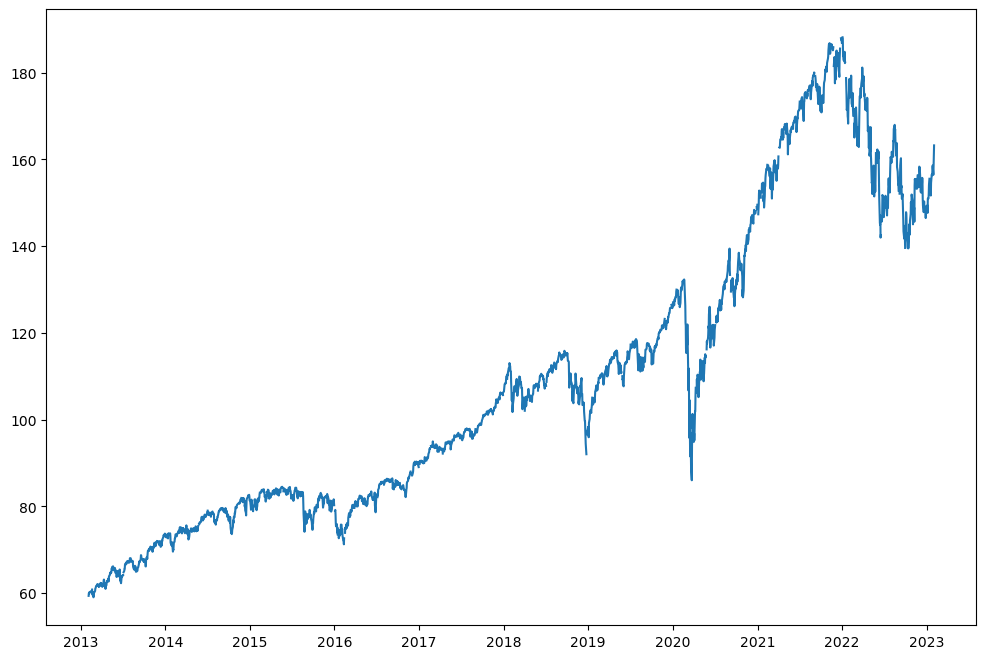

In [31]:
fig = plt.figure(figsize=(12,8))

# starting and ending dates
min_date = combined.index.values[0]
max_date = combined.index.values[-1]
num_dates = len(combined.index.values)
quarter_date = combined.index.values[int(num_dates/4)]
three_quarter_date = combined.index.values[int(3*num_dates/4)]

plt.plot(combined.index.values,combined.Buffett_Indicator)

plt.show()

### Warren Buffett suggests that:
#### if the Buffett Indicator is greater than 100% it means that the stocks are **overvalued**.
#### if the Buffett Indicator is less than 80% it means that the stocks are **undervalued**.
#### Basically, the indicator sets an investing phase when the value is less than 80%, ceasing it when the value is greater than 100%.

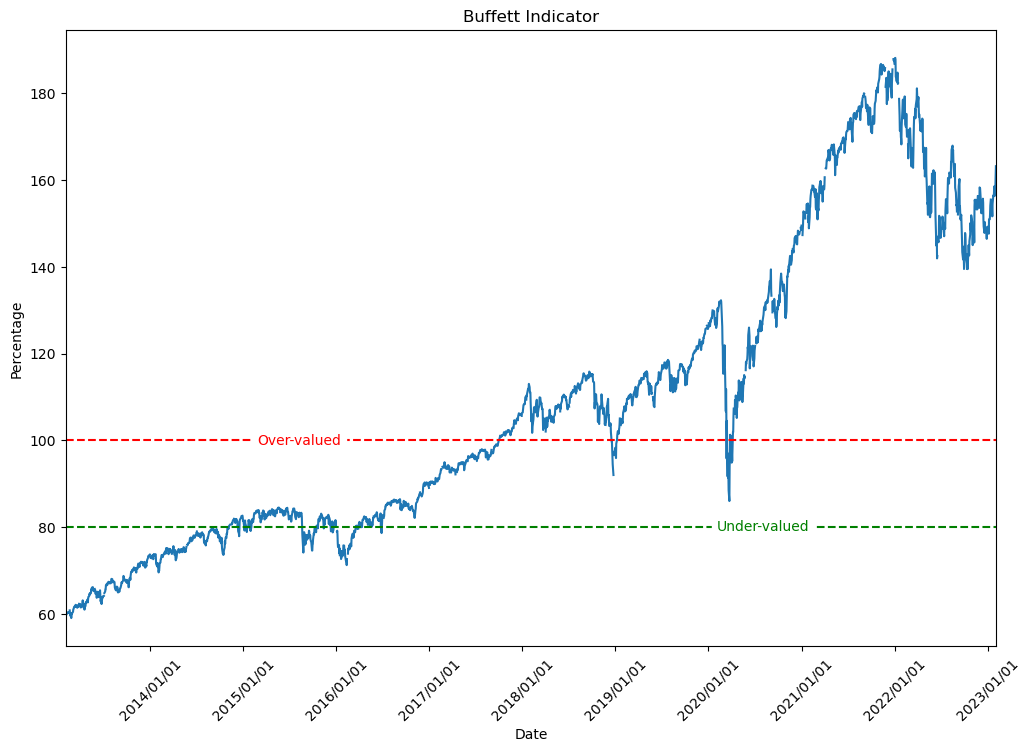

In [33]:
fig = plt.figure(figsize=(12,8))

plt.plot(combined.index.values,combined.Buffett_Indicator)

ax = plt.gca()

import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%Y/%m/%d')
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel('Date')
ax.set_ylabel('Percentage')
ax.set_title('Buffett Indicator')
ax.set_xlim(min_date,max_date)

# Rotate the x-tick labels so that they are more legible
plt.xticks(rotation=45)

# Add the horizontal lines
plt.hlines(100,min_date,max_date,colors='r',linestyle='dashed')
plt.hlines(80,min_date,max_date,colors='g',linestyle='dashed')

plt.text(quarter_date,100,'Over-valued',ha='center',va='center',color='r',backgroundcolor='white')
plt.text(three_quarter_date,80,'Under-valued',ha='center',va='center',color='g',backgroundcolor='white')

plt.show()